<a href="https://colab.research.google.com/github/akshayjain3450/Semester7/blob/master/Deep%20Learning/Assignments/CNN_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Libraries Required

In [ ]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import time
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
import numpy as np

Processor (GPU or CPU), change runtime on colab for GPU

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize(mean=0.1,std=0.3)])

train_set = torchvision.datasets.MNIST(root = "../data",train=True,download=True,transform=transform)
test_set = torchvision.datasets.MNIST(root ="../data",train=False,download=True,transform=transform)

train_loader = torch.utils.data.DataLoader(train_set,batch_size=10,shuffle=True,num_workers=0)
test_loader = torch.utils.data.DataLoader(test_set,batch_size=10,shuffle=True,num_workers=0)

In [ ]:
data_train = enumerate(train_loader)
batch_id , (images,labels) = next(data_train)

In [ ]:
images.shape

torch.Size([10, 1, 28, 28])

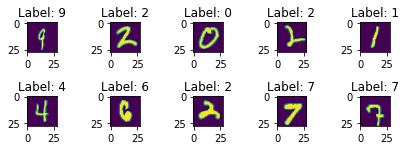

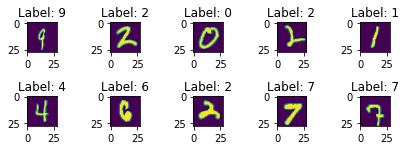

In [ ]:
figure = plt.figure()
for i in range(0,10):
  plt.subplot(4,5,i+1)
  plt.tight_layout()
  plt.imshow(images[i][0])
  plt.title("Label: {}".format(labels[i]))
figure

In [ ]:
class Net(nn.Module):
    def __init__(self,num_classes=10):
        super(Net,self).__init__()

        # Instantiate two convolutional layers
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=5, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=5, out_channels=10, kernel_size=3, padding=1)

        # Instantiate a max pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        
        # Instantiate a fully connected layer
        self.fc1 = nn.Linear(7 * 7 * 10, 100)
        self.fc2 = nn.Linear(100,num_classes)
    
    def forward(self,x):
        # Apply conv followd by relu, then in next line pool
        x = F.relu(self.conv1(x))
        x = self.pool(x)

        # Apply conv followd by relu, then in next line pool
        x = F.relu(self.conv2(x))
        x = self.pool(x)

        # Prepare the image for the fully connected layer
        x = x.view(-1, 7*7*10)
        x = self.fc1(x)

        # Apply the fully connected layer and return the result
        return self.fc2(x)

# To calculate output size use formula (W - K + 2P/S) + 1
# image dimension is 28 * 28 * 1
# W = 28 , K = 3 , P = 1 , S = 1
# after con1 , output size is 28*28*5
# after first maxpool, output size is 14*14*5
# after conv2, output size is 14*14*10
# after second maxpool , output size is 7*7*10

# NOTE : For maxpool use same formula, just replace kernel with maxpool size

In [ ]:
model = Net()
model.to(device) # transfer to GPU if available
optimizer = torch.optim.Adam(model.parameters(),lr=0.1)
calculate_loss = nn.CrossEntropyLoss()

num_epochs = 100

since = time.time()

gradient_vector = []
for epoch in range(num_epochs):
    print('Epoch {}/{}'.format(epoch, num_epochs - 1))
    print('-' * 10)
    #scheduler.step()
    model.train()
    running_loss = 0.0
    tk0 = tqdm(train_loader, total=int(len(train_loader)))
    counter = 0



    # Training Code start 
    for batch_idx, data_set in enumerate(tk0):

        optimizer.zero_grad()  # Clear the old gradients from last step  
        data , labels = data_set
        data = data.to(device)
        labels = labels.to(device)
        output = model(data)   #forward
        output.to(device)
        loss = calculate_loss(output,labels) #calculate loss
        loss.backward()
        optimizer.step()

        # Training code ends



        running_loss += loss.item() * data.size(0)
        counter += 1
        tk0.set_postfix(loss=(running_loss / (counter * train_loader.batch_size)))
    
    #Gradients
    g_2 = []
    for name, param in model.named_parameters():
        if param.requires_grad and "bias" not in name:
            #print (name, param.grad.data)
            g_2.append(torch.flatten(param.grad.data))
    print(torch.norm(torch.cat([g_2[0],g_2[1],g_2[2],g_2[3]],dim=0)))
    gradient_vector.append(torch.norm(torch.cat([g_2[0],g_2[1],g_2[2],g_2[3]],dim=0)).item())

    
    # #weights
    # for name, param in model.named_parameters():
    #     if param.requires_grad:
    #         print (name, param.data)
    

time_elapsed = time.time() - since
print('\nTraining completed in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))


Epoch 0/99
----------


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



tensor(0.3955, device='cuda:0')
Epoch 1/99
----------



tensor(0.1580, device='cuda:0')
Epoch 2/99
----------



tensor(0.2411, device='cuda:0')
Epoch 3/99
----------



tensor(0.2076, device='cuda:0')
Epoch 4/99
----------



tensor(0.1317, device='cuda:0')
Epoch 5/99
----------



tensor(0.2366, device='cuda:0')
Epoch 6/99
----------



tensor(0.1286, device='cuda:0')
Epoch 7/99
----------



tensor(0.2682, device='cuda:0')
Epoch 8/99
----------



tensor(0.2677, device='cuda:0')
Epoch 9/99
----------



tensor(0.3952, device='cuda:0')
Epoch 10/99
----------



tensor(0.2259, device='cuda:0')
Epoch 11/99
----------



tensor(0.1914, device='cuda:0')
Epoch 12/99
----------



tensor(0.2115, device='cuda:0')
Epoch 13/99
----------



tensor(0.2228, device='cuda:0')
Epoch 14/99
----------



tensor(0.2508, device='cuda:0')
Epoch 15/99
----------



tensor(0.2155, device='cuda:0')
Epoch 16/99
----------



tensor(0.0975, device='cuda:0')
Epoch 17/99
----------



tensor(0.3290, device='cuda:0')
Epoch 18/99
----------



tensor(0.1817, device='cuda:0')
Epoch 19/99
----------



tensor(0.1463, device='cuda:0')
Epoch 20/99
----------



tensor(0.1192, device='cuda:0')
Epoch 21/99
----------



tensor(0.1573, device='cuda:0')
Epoch 22/99
----------



tensor(0.2096, device='cuda:0')
Epoch 23/99
----------



tensor(0.2689, device='cuda:0')
Epoch 24/99
----------



tensor(0.1996, device='cuda:0')
Epoch 25/99
----------



tensor(0.0968, device='cuda:0')
Epoch 26/99
----------



tensor(0.2513, device='cuda:0')
Epoch 27/99
----------



tensor(0.1475, device='cuda:0')
Epoch 28/99
----------



tensor(0.1279, device='cuda:0')
Epoch 29/99
----------



tensor(0.1213, device='cuda:0')
Epoch 30/99
----------



tensor(0.1763, device='cuda:0')
Epoch 31/99
----------



tensor(0.1682, device='cuda:0')
Epoch 32/99
----------



tensor(0.1680, device='cuda:0')
Epoch 33/99
----------



tensor(0.1761, device='cuda:0')
Epoch 34/99
----------



tensor(0.1698, device='cuda:0')
Epoch 35/99
----------



tensor(0.3479, device='cuda:0')
Epoch 36/99
----------



tensor(0.5975, device='cuda:0')
Epoch 37/99
----------



tensor(0.1745, device='cuda:0')
Epoch 38/99
----------



tensor(0.2267, device='cuda:0')
Epoch 39/99
----------



tensor(0.1964, device='cuda:0')
Epoch 40/99
----------



tensor(0.1957, device='cuda:0')
Epoch 41/99
----------



tensor(0.1888, device='cuda:0')
Epoch 42/99
----------



tensor(0.2278, device='cuda:0')
Epoch 43/99
----------



tensor(0.1468, device='cuda:0')
Epoch 44/99
----------



tensor(0.1232, device='cuda:0')
Epoch 45/99
----------



tensor(0.0996, device='cuda:0')
Epoch 46/99
----------



tensor(0.1307, device='cuda:0')
Epoch 47/99
----------



tensor(0.0866, device='cuda:0')
Epoch 48/99
----------



tensor(0.3288, device='cuda:0')
Epoch 49/99
----------



tensor(0.3223, device='cuda:0')
Epoch 50/99
----------



tensor(0.1055, device='cuda:0')
Epoch 51/99
----------



tensor(0.1807, device='cuda:0')
Epoch 52/99
----------



tensor(0.0931, device='cuda:0')
Epoch 53/99
----------



tensor(0.1564, device='cuda:0')
Epoch 54/99
----------



tensor(0.1562, device='cuda:0')
Epoch 55/99
----------



tensor(0.1861, device='cuda:0')
Epoch 56/99
----------



tensor(0.2244, device='cuda:0')
Epoch 57/99
----------



tensor(0.2837, device='cuda:0')
Epoch 58/99
----------



tensor(0.1787, device='cuda:0')
Epoch 59/99
----------



tensor(0.2249, device='cuda:0')
Epoch 60/99
----------



tensor(0.1870, device='cuda:0')
Epoch 61/99
----------



tensor(0.1664, device='cuda:0')
Epoch 62/99
----------



tensor(0.1437, device='cuda:0')
Epoch 63/99
----------



tensor(0.1094, device='cuda:0')
Epoch 64/99
----------


Buffered data was truncated after reaching the output size limit.

In [ ]:
correct, total = 0 , 0
predictions = []
model.eval()

for i, data_set in enumerate(test_loader):
  data, labels = data_set
  data, labels = data.to(device), labels.to(device)
  output = model(data)
  _, predicted = torch.max(output.data,1)
  predictions.append(output)
  total += labels.size(0)
  correct += (predicted == labels).sum().item()

print('The testing set accuracy of the network is: %f %%' % (100 * correct / (total/10)))

The testing set accuracy of the network is: 97.400000 %


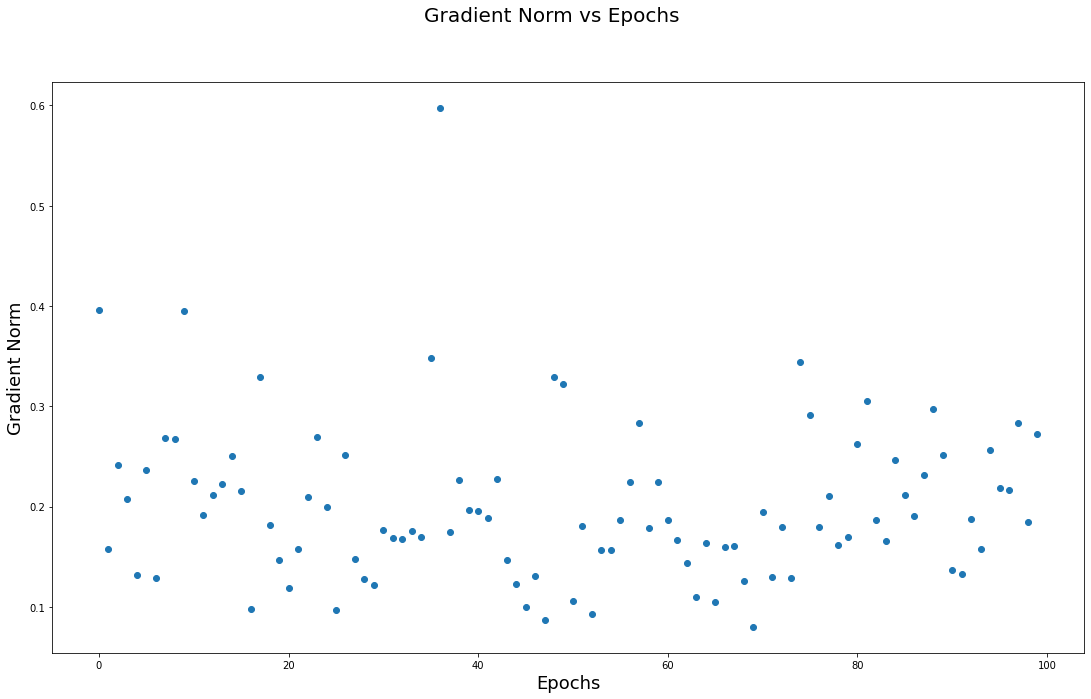

In [ ]:
x = np.arange(len(gradient_vector))
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.suptitle('Gradient Norm vs Epochs', fontsize=20)
plt.xlabel('Epochs', fontsize=18)
plt.ylabel('Gradient Norm', fontsize=18)
plt.scatter(x,gradient_vector)
plt.savefig('scatterplot_gradient norm vs epochs.pdf')